In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!unzip /content/drive/'My Drive'/data.zip
%cd /content/data

Streaming output truncated to the last 5000 lines.
  inflating: data/Train/5/00005_00017_00019.png  
  inflating: data/Train/5/00005_00017_00025.png  
  inflating: data/Train/5/00005_00017_00027.png  
  inflating: data/Train/5/00005_00017_00028.png  
  inflating: data/Train/5/00005_00017_00029.png  
  inflating: data/Train/5/00005_00018_00000.png  
  inflating: data/Train/5/00005_00018_00001.png  
  inflating: data/Train/5/00005_00018_00004.png  
  inflating: data/Train/5/00005_00018_00009.png  
  inflating: data/Train/5/00005_00018_00010.png  
  inflating: data/Train/5/00005_00018_00011.png  
  inflating: data/Train/5/00005_00018_00012.png  
  inflating: data/Train/5/00005_00018_00013.png  
  inflating: data/Train/5/00005_00018_00015.png  
  inflating: data/Train/5/00005_00018_00016.png  
  inflating: data/Train/5/00005_00018_00017.png  
  inflating: data/Train/5/00005_00018_00019.png  
  inflating: data/Train/5/00005_00018_00020.png  
  inflating: data/Train/5/00005_00018_00021.png  

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image,ImageOps
from keras.layers import Conv2D, MaxPool2D,Dense,Dropout,Flatten
from keras.utils import to_categorical 
from keras.models import Sequential
import pandas as pd

In [ ]:
size = 50

In [ ]:
os.getcwd()

'/content/data'

In [ ]:
train_data = pd.read_csv('Train.csv')

In [ ]:
train_data

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png
...,...,...
31363,42,Train/42/00042_00007_00023.png
31364,42,Train/42/00042_00007_00024.png
31365,42,Train/42/00042_00007_00026.png
31366,42,Train/42/00042_00007_00027.png


In [ ]:
image_train = []
train_label = []
classes = 43 
for i in range(train_data.shape[0]):
  temp_image = Image.open(train_data.iloc[i]["Path"]).convert("RGB")
  temp_image = temp_image.resize((size,size))
  temp_array = np.array(temp_image)
  image_train.append(temp_array)
  train_label.append(train_data.iloc[i]["ClassId"])

In [ ]:
len(image_train)

31368

In [ ]:
len(train_label)

31368

In [ ]:
valid_data = pd.read_csv("Validation.csv")

In [ ]:
valid_data

,Unnamed: 0,ClassId,Path
0,0,0,00000_00001_00025.png
1,1,0,00000_00001_00013.png
2,2,0,00000_00004_00025.png
3,3,0,00000_00001_00020.png
4,4,0,00000_00005_00024.png
...,...,...,...
7836,7836,42,00042_00001_00011.png
7837,7837,42,00042_00006_00011.png
7838,7838,42,00042_00005_00026.png
7839,7839,42,00042_00004_00016.png


In [ ]:
image_valid = []
valid_label = []
for i in range(valid_data.shape[0]):
  temp_image = Image.open("Validation/"+valid_data.iloc[i]["Path"]).convert("RGB")
  temp_image = temp_image.resize((size,size))
  temp_array = np.array(temp_image)
  image_valid.append(temp_array)
  valid_label.append(valid_data.iloc[i]["ClassId"])

In [ ]:
image_train = np.array(image_train)
image_valid = np.array(image_valid)
train_label = np.array(train_label)
valid_label = np.array(valid_label)

In [ ]:
image_train.shape

(31368, 50, 50, 3)

In [ ]:
image_valid.shape,train_label.shape,valid_label.shape

((7841, 50, 50, 3), (31368,), (7841,))

In [ ]:
train_label = to_categorical(train_label, 43)
valid_label = to_categorical(valid_label, 43)

In [ ]:
train_label.shape

(31368, 43)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=image_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(rate=0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs = 25

In [ ]:
train_history = model.fit(image_train, train_label, validation_data=(image_valid, valid_label), batch_size=32, epochs=epochs)

Epoch 1/25
981/981 [==============================] - 15s 8ms/step - loss: 2.8581 - accuracy: 0.5063 - val_loss: 0.1673 - val_accuracy: 0.9610
Epoch 2/25
981/981 [==============================] - 7s 7ms/step - loss: 0.2315 - accuracy: 0.9387 - val_loss: 0.1128 - val_accuracy: 0.9690
Epoch 3/25
981/981 [==============================] - 7s 7ms/step - loss: 0.1527 - accuracy: 0.9580 - val_loss: 0.0748 - val_accuracy: 0.9816
Epoch 4/25
981/981 [==============================] - 7s 7ms/step - loss: 0.1013 - accuracy: 0.9731 - val_loss: 0.0763 - val_accuracy: 0.9813
Epoch 5/25
981/981 [==============================] - 7s 7ms/step - loss: 0.0887 - accuracy: 0.9766 - val_loss: 0.0480 - val_accuracy: 0.9889
Epoch 6/25
981/981 [==============================] - 7s 7ms/step - loss: 0.0900 - accuracy: 0.9778 - val_loss: 0.0785 - val_accuracy: 0.9800
Epoch 7/25
981/981 [==============================] - 7s 7ms/step - loss: 0.0827 - accuracy: 0.9788 - val_loss: 0.0438 - val_accuracy: 0.9888
Epoch

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         7

/content


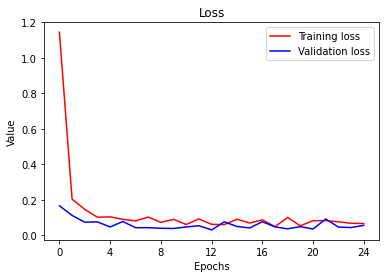

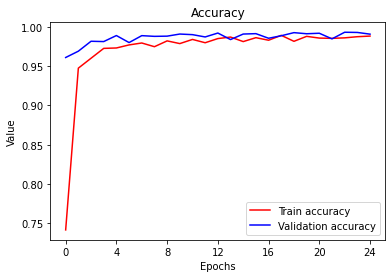

In [ ]:
%cd /content

title=['Loss','Accuracy']
parameter={0:['loss','val_loss'],1:['accuracy','val_accuracy']}
labels={0:['Training loss','Validation loss'],1:['Train accuracy','Validation accuracy']}
for i in range(2): 
  plt.plot(np.arange(epochs),train_history.history[parameter.get(i)[0]],color='red',label=labels.get(i)[0])
  plt.plot(np.arange(epochs),train_history.history[parameter.get(i)[1]],color='blue',label=labels.get(i)[1])
  plt.title(title[i])
  plt.xticks(np.arange(0,epochs,4))
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend()
  plt.savefig("{}.png".format(title[i]))
  plt.show()

plt.show()

In [ ]:
%cd /content/data

/content/data


In [ ]:
test_data = pd.read_csv('Test.csv')

In [ ]:
test_data

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png
...,...,...
12625,12,Test/12625.png
12626,33,Test/12626.png
12627,6,Test/12627.png
12628,7,Test/12628.png


In [ ]:
image_test = []
test_label = []
for i in range(test_data.shape[0]):
  temp_image = Image.open(test_data.iloc[i]["Path"]).convert("RGB")
  temp_image = temp_image.resize((size,size))
  temp_array = np.array(temp_image)
  image_test.append(temp_array)
  test_label.append(test_data.iloc[i]["ClassId"])

In [ ]:
x_test=np.array(image_test)
labels_predict_for_test=np.argmax(model.predict(x_test),axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Test:",accuracy_score(labels_predict_for_test,test_label))

Accuracy for Test: 0.9539192399049882


In [ ]:
%cd /content

/content


In [ ]:
model.save('4_convoltional_layers.h5')